In [1]:
# -*- coding: utf-8 -*-

import os
import sys
import xlrd
from copy import deepcopy
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 图片设置
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# 解决中文显示问题
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
# 列显示
pd.set_option('display.max_columns', 1000)

##    ** 数据最全的站点 **

In [2]:
data_dir = './hourly_data'
# 中国环境监测总站, 数据较全
jczz = os.path.join(data_dir, '110000012.txt')

In [3]:
data = pd.read_csv(
    jczz, 
    sep=',', 
    names=[
        'time','stationcode','longitude','latitude',
        'PM10','PM25',
        'Cl-','NO3-','SO42-','Ca2+','Na+','K+','NH4+','Mg2+',
        'OC','EC',
        'Hg','Br','As','Si','Se','Te','V','Ca','Ti','Ba','Sc',
        'Pd','Co','Mo','K','Fe','Pb','TI','Cu','Cr','Cs','Ag',
        'Zn','Sb','Sn','Mn','Cd','Ni','Ga'],
    encoding='utf-8')

In [4]:
data.head()

,time,stationcode,longitude,latitude,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,OC,EC,Hg,Br,As,Si,Se,Te,V,Ca,Ti,Ba,Sc,Pd,Co,Mo,K,Fe,Pb,TI,Cu,Cr,Cs,Ag,Zn,Sb,Sn,Mn,Cd,Ni,Ga
0,2019-01-01:00,110000012,116.426,40.048,97.92,66.830,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.525,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.0,-999.0,-999.000,-999.000,-999.000,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.0,-999.000,-999.0,-999.0,-999.000,NaN,NaN,NaN
1,2019-01-01:01,110000012,116.426,40.048,95.92,59.340,4.777,7.389,0.101,0.190,0.495,0.770,7.297,0.034,8.569,2.035,-999.0,24.363,2.447,582.994,9.484,-999.0,-999.0,532.644,24.715,66.903,1.146,-999.0,10.852,84.933,826.137,756.589,81.246,4.575,135.414,15.796,11.278,-999.0,243.554,-999.0,-999.0,85.677,-999.0,15.792,10.030
2,2019-01-01:02,110000012,116.426,40.048,78.62,51.570,3.188,7.599,0.075,0.177,0.422,0.583,6.282,0.032,6.164,1.269,-999.0,24.815,5.972,769.016,11.844,-999.0,-999.0,771.753,30.422,93.461,2.479,-999.0,3.585,26.758,918.143,838.080,86.893,-999.000,47.587,12.914,7.485,-999.0,244.243,-999.0,-999.0,60.340,-999.0,-999.000,9.985
3,2019-01-01:03,110000012,116.426,40.048,95.27,44.566,3.130,7.335,2.560,0.167,0.410,0.505,6.277,0.033,6.397,1.177,-999.0,21.289,6.292,384.104,8.320,-999.0,-999.0,558.127,7.224,63.813,1.148,-999.0,3.077,107.964,527.728,596.601,53.350,-999.000,149.217,9.557,9.622,-999.0,214.838,-999.0,-999.0,80.626,-999.0,10.716,6.285
4,2019-01-01:04,110000012,116.426,40.048,86.61,51.520,2.687,7.723,2.679,0.178,0.419,0.501,6.190,0.033,6.365,1.330,-999.0,15.307,4.559,536.331,2.958,-999.0,-999.0,503.740,19.501,56.452,5.633,-999.0,8.779,61.430,555.248,569.188,59.979,-999.000,84.185,7.431,2.613,-999.0,182.973,-999.0,-999.0,63.164,-999.0,-999.000,5.983


In [5]:
# -999.0 表示无效记录，但至少有记录表示，有些时间段是完全没有记录的

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8760 non-null   object 
 1   stationcode  8760 non-null   int64  
 2   longitude    8760 non-null   float64
 3   latitude     8760 non-null   float64
 4   PM10         8760 non-null   float64
 5   PM25         8760 non-null   float64
 6   Cl-          8760 non-null   float64
 7   NO3-         8760 non-null   float64
 8   SO42-        8760 non-null   float64
 9   Ca2+         8760 non-null   float64
 10  Na+          8760 non-null   float64
 11  K+           8760 non-null   float64
 12  NH4+         8760 non-null   float64
 13  Mg2+         8760 non-null   float64
 14  OC           8760 non-null   float64
 15  EC           8760 non-null   float64
 16  Hg           8760 non-null   float64
 17  Br           8760 non-null   float64
 18  As           8760 non-null   float64
 19  Si    

+ 先进行组分分类，分别关联PM10，PM25以便后期分析
+ 第一步预处理，替换无效值

In [5]:
# water-soluble ionic 水溶性离子
obs_ionic = data[['time', 'PM10', 'PM25', 'Cl-', 'NO3-', 'SO42-', 'Ca2+', 'Na+', 'K+', 'NH4+', 'Mg2+']]
# 替换-999.0 为nan
obs_ionic.replace(-999.0, np.nan, inplace=True)
# 处理时间
obs_ionic['time'] = obs_ionic['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d:%H"))

In [6]:
obs_ionic.head()

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
0,2019-01-01 00:00:00,97.92,66.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00,95.92,59.340,4.777,7.389,0.101,0.190,0.495,0.770,7.297,0.034
2,2019-01-01 02:00:00,78.62,51.570,3.188,7.599,0.075,0.177,0.422,0.583,6.282,0.032
3,2019-01-01 03:00:00,95.27,44.566,3.130,7.335,2.560,0.167,0.410,0.505,6.277,0.033
4,2019-01-01 04:00:00,86.61,51.520,2.687,7.723,2.679,0.178,0.419,0.501,6.190,0.033


In [7]:
obs_ionic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    8760 non-null   datetime64[ns]
 1   PM10    8704 non-null   float64       
 2   PM25    8705 non-null   float64       
 3   Cl-     8709 non-null   float64       
 4   NO3-    8712 non-null   float64       
 5   SO42-   8712 non-null   float64       
 6   Ca2+    8621 non-null   float64       
 7   Na+     8710 non-null   float64       
 8   K+      8688 non-null   float64       
 9   NH4+    8712 non-null   float64       
 10  Mg2+    8402 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 752.9 KB


+ 看下数据的统计分布

In [8]:
obs_ionic.describe(percentiles=[.7, .8, .85, .9, .95])

,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
count,8704.00000,8705.000000,8709.00000,8712.000000,8712.000000,8621.000000,8710.000000,8688.000000,8712.000000,8402.000000
mean,68.93929,45.263637,1.05196,10.868177,5.570272,0.268789,0.717178,0.478105,6.960854,0.106421
std,65.32186,40.918336,2.32497,13.433143,6.499598,1.436143,2.818841,1.468680,6.830384,0.929603
min,0.00700,0.039000,0.02000,0.056000,0.020000,0.002620,0.010000,0.010000,0.017000,0.001620
50%,47.61500,32.940000,0.42400,5.551500,3.430000,0.120000,0.381000,0.250000,4.859500,0.040000
70%,73.52400,51.448000,0.82160,11.816200,6.267100,0.210000,0.493000,0.419000,8.578800,0.050000
80%,100.52200,65.660000,1.38280,17.836200,8.746800,0.300000,0.569000,0.540600,11.128400,0.061000
85%,119.46400,75.832000,1.90380,21.549750,10.113350,0.357000,0.636000,0.653000,12.912050,0.071000
90%,149.09000,91.640000,2.64140,27.009000,12.155500,0.430000,0.751100,0.914000,15.325900,0.090000
95%,193.97300,128.688000,3.99980,37.629350,16.034700,0.555000,1.169550,1.300650,20.763000,0.119950


### 看下饼状图，水溶性离子的均值的分布（未剔除异常值，仅考虑了缺省值）

In [9]:
obs_ionic.describe()[1:2][obs_ionic.columns[3:]]

,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
mean,1.05196,10.868177,5.570272,0.268789,0.717178,0.478105,6.960854,0.106421


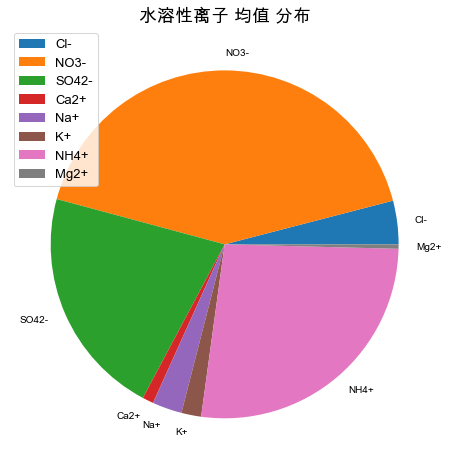

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(x=obs_ionic.describe()[1:2][obs_ionic.columns[3:]], labels=obs_ionic.describe().columns[2:], labeldistance=1.1)
ax.set_title('水溶性离子 均值 分布', fontsize=18)
ax.legend(loc='upper left', fontsize=13)
# plt.savefig('../DataVisual/images/水溶性离子均值分布.png')
plt.show()

---

## 关于水溶性离子的 **一些质控方案**

+ Sulfate  Nitrate Ammonium other
+ 硫酸盐    硝酸盐   铵盐
---
+ 1.SNA = NO3- + SO42- + NH4+  --> 统计百分位数情况；
---
+ 2.离子平衡关系 (SO42-*2/96 + NO3-/62) / (NH4+/18)   between 0.7 - 1.3
+   严重偏离回归曲线的点，则需重点关注，进一步结合当天污染情况判断是否为无效数据；
+   清洁天（PM2.5浓度≤15ug/m³）和沙尘天（PM2.5/PM10<30%，可参考国家标准），该审核依据不适用；
---
+ 3.当 NH4+、NO3-、SO42-浓度较前、 后相邻数据的偏差均超过 40%可能为异常值；
---
+ 4.计算 各离子组分浓度之和 ，比较其与PM2.5时间序列变化趋势，如果二值差异较大，进一步判定离子组分是否异常。
+   对PM2.5和 离子组分之和 做相关性分析，散点图上比较分散的点判定为异常值

In [11]:
obs_ionic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    8760 non-null   datetime64[ns]
 1   PM10    8704 non-null   float64       
 2   PM25    8705 non-null   float64       
 3   Cl-     8709 non-null   float64       
 4   NO3-    8712 non-null   float64       
 5   SO42-   8712 non-null   float64       
 6   Ca2+    8621 non-null   float64       
 7   Na+     8710 non-null   float64       
 8   K+      8688 non-null   float64       
 9   NH4+    8712 non-null   float64       
 10  Mg2+    8402 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 752.9 KB


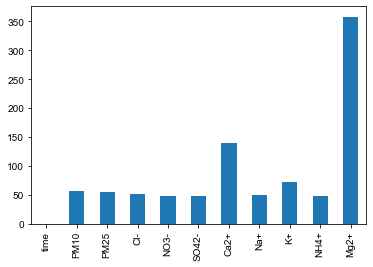

In [12]:
# 统计缺失情况

obs_ionic[obs_ionic.columns].isna().sum().plot(kind='bar')

+ 异常数据分离为 缺失组 和 完整组

In [13]:
# 缺失的观测时刻
obs_ionic1 = obs_ionic[obs_ionic.isnull().values==True].drop_duplicates()
obs_ionic1.sample(3)

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
3378,2019-05-21 18:00:00,83.69,12.07,0.07,2.63,0.660,0.05,0.010,NaN,1.180,0.06
4000,2019-06-16 16:00:00,26.06,26.84,0.52,7.71,2.539,0.06,1.128,0.384,3.863,NaN
2142,2019-03-31 06:00:00,34.85,9.49,0.58,3.01,1.260,0.05,0.535,0.109,0.889,NaN


In [14]:
# dropna : 清除缺失情况，完整数据集
obs_ionic0 = obs_ionic.fillna(np.nan)
# 离子总浓度
obs_ionic0['ionic'] = obs_ionic0[obs_ionic0.columns[3:]].apply(lambda x: x.sum(), axis=1)
# SNA总浓度
obs_ionic0['SNA'] = obs_ionic0[['SO42-','NO3-','NH4+']].apply(lambda x: x.sum(), axis=1)
# others总浓度
obs_ionic0['others'] = obs_ionic0['ionic'] - obs_ionic0['SNA']
obs_ionic0

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,ionic,SNA,others
0,2019-01-01 00:00:00,97.92,66.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000
1,2019-01-01 01:00:00,95.92,59.340,4.777,7.389,0.101,0.190,0.495,0.770,7.297,0.034,21.053,14.787,6.266
2,2019-01-01 02:00:00,78.62,51.570,3.188,7.599,0.075,0.177,0.422,0.583,6.282,0.032,18.358,13.956,4.402
3,2019-01-01 03:00:00,95.27,44.566,3.130,7.335,2.560,0.167,0.410,0.505,6.277,0.033,20.417,16.172,4.245
4,2019-01-01 04:00:00,86.61,51.520,2.687,7.723,2.679,0.178,0.419,0.501,6.190,0.033,20.410,16.592,3.818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,51.46,29.440,1.020,4.004,2.340,0.140,0.462,0.247,3.824,0.040,12.077,10.168,1.909
8756,2019-12-31 20:00:00,43.84,NaN,1.171,4.312,2.497,0.136,0.547,0.299,4.153,0.040,13.155,10.962,2.193
8757,2019-12-31 21:00:00,61.52,35.490,1.799,4.529,2.784,0.171,0.643,0.295,4.589,0.050,14.860,11.902,2.958
8758,2019-12-31 22:00:00,70.54,29.840,1.273,4.090,2.438,0.188,0.544,0.325,3.908,0.040,12.806,10.436,2.370


+ PM与SNA组间的相关性

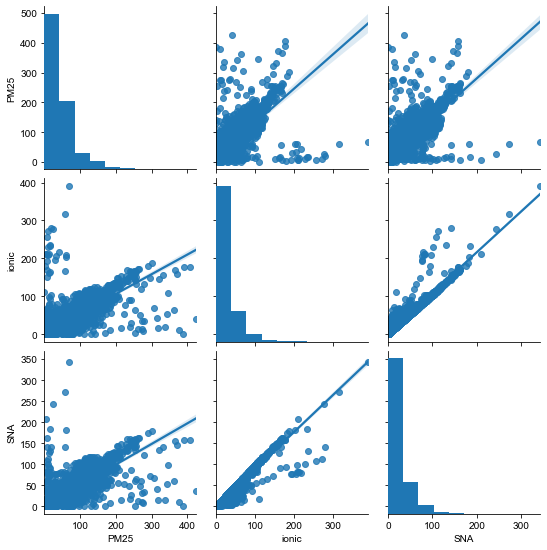

In [15]:
sns.pairplot(obs_ionic0[['PM25', 'ionic', 'SNA']], kind='reg')

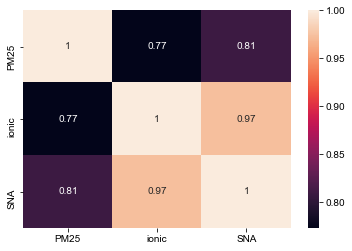

In [16]:
sns.heatmap(obs_ionic0[['PM25', 'ionic', 'SNA']].corr(), annot=True)

+ SNA组间数据的相关性

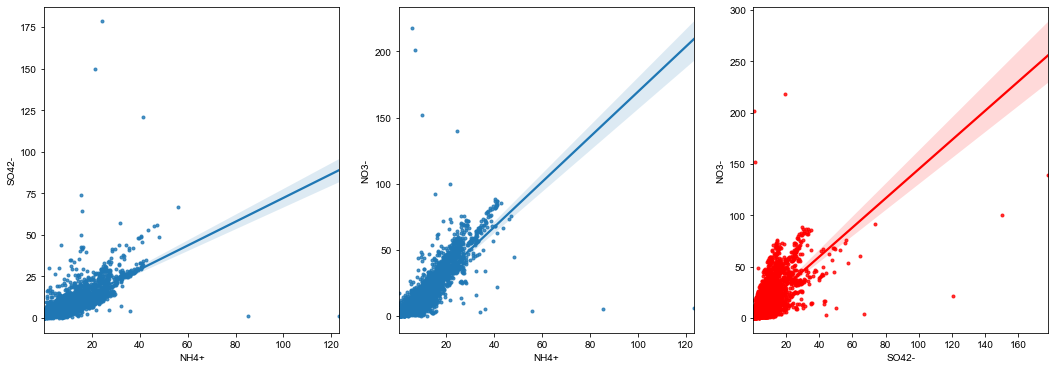

In [17]:
fig, axes=plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(x='NH4+', y='SO42-', data=obs_ionic0, ax=axes[0], marker='.')
sns.regplot(x='NH4+', y='NO3-', data=obs_ionic0, ax=axes[1], marker='.')
sns.regplot(x='SO42-', y='NO3-', data=obs_ionic0, ax=axes[2], marker='.', color='r')

In [18]:
obs_ionic.loc[(obs_ionic['PM10']/obs_ionic['PM25'])>12.8].shape

(89, 11)

## PM一致性讨论

In [19]:
obs_PM = obs_ionic[['time', 'PM10', 'PM25']]
obs_PM['PM10/PM25'] = obs_PM['PM10']/obs_PM['PM25']
obs_PM['PM10-PM25'] = obs_PM['PM10']-obs_PM['PM25']
obs_PM.describe(percentiles=[.25, .28, .3, .4, .5, .8, .9, .95, .97, .99])

,PM10,PM25,PM10/PM25,PM10-PM25
count,8704.00000,8705.000000,8693.000000,8693.000000
mean,68.93929,45.263637,2.379388,23.660967
std,65.32186,40.918336,9.450552,55.465864
min,0.00700,0.039000,0.000412,-394.880000
25%,29.52000,18.280000,0.932608,-2.280000
28%,31.60000,19.721200,0.998187,-0.074800
30%,33.00000,20.676400,1.042923,1.386000
40%,39.85000,25.990000,1.245239,7.874000
50%,47.61500,32.940000,1.451844,14.540000
80%,100.52200,65.660000,2.644588,45.188000


In [20]:
obs_diff = obs_PM[['PM10', 'PM25']].diff().rename(columns={'PM10':'diff_PM10', 'PM25':'diff_PM25'})
obs_diff['time'] = obs_PM['time']
obs_diff

,diff_PM10,diff_PM25,time
0,NaN,NaN,2019-01-01 00:00:00
1,-2.00,-7.490,2019-01-01 01:00:00
2,-17.30,-7.770,2019-01-01 02:00:00
3,16.65,-7.004,2019-01-01 03:00:00
4,-8.66,6.954,2019-01-01 04:00:00
...,...,...,...
8755,-39.11,5.050,2019-12-31 19:00:00
8756,-7.62,NaN,2019-12-31 20:00:00
8757,17.68,NaN,2019-12-31 21:00:00
8758,9.02,-5.650,2019-12-31 22:00:00


In [21]:
abs(obs_ionic[['PM10', 'PM25']].diff()).describe(percentiles=[.02, .05, .1, .2, .3, .4, .5, .8, .9, .95, .97, .99]).T

,count,mean,std,min,2%,5%,10%,20%,30%,40%,50%,80%,90%,95%,97%,99%,max
PM10,8672.0,16.448745,30.429946,0.0,0.32,0.8155,1.7000,3.63,5.483,7.65,10.01,21.13,31.663,47.0980,63.78310,130.6029,727.506
PM25,8673.0,7.049660,14.172167,0.0,0.14,0.3400,0.6792,1.36,2.170,3.06,4.04,9.11,13.914,20.9248,27.86008,52.0056,378.550


In [22]:
PM_done = pd.merge(obs_PM, obs_diff, left_on='time', right_on='time', how='outer')
PM_done['PM10_ratio'] = abs(PM_done['diff_PM10']) / PM_done['PM10']
PM_done['PM25_ratio'] = abs(PM_done['diff_PM25']) / PM_done['PM25']
PM_done.sample(3)

,time,PM10,PM25,PM10/PM25,PM10-PM25,diff_PM10,diff_PM25,PM10_ratio,PM25_ratio
3107,2019-05-10 11:00:00,126.08,75.06,1.679723,51.02,12.23,8.50,0.097002,0.113243
8226,2019-12-09 18:00:00,73.32,113.49,0.646048,-40.17,-3.80,-15.83,0.051828,0.139484
8013,2019-11-30 21:00:00,37.06,19.33,1.917227,17.73,-14.80,9.07,0.399352,0.469219


In [23]:
PM_done.describe(percentiles=[.02, .05, .1, .5, .8, .9, .95, .97, .99]).T

,count,mean,std,min,2%,5%,10%,50%,80%,90%,95%,97%,99%,max
PM10,8704.0,68.939290,65.321860,0.007000,7.320600,12.566000,18.192000,47.615000,100.522000,149.090000,193.973000,229.332400,310.069300,916.600000
PM25,8705.0,45.263637,40.918336,0.039000,6.783200,9.456400,12.340000,32.940000,65.660000,91.640000,128.688000,147.350800,196.977600,425.020000
PM10/PM25,8693.0,2.379388,9.450552,0.000412,0.257582,0.437419,0.591460,1.451844,2.644588,3.940394,5.933142,7.931307,12.836278,450.576923
PM10-PM25,8693.0,23.660967,55.465864,-394.880000,-53.415600,-33.292000,-19.146000,14.540000,45.188000,72.298000,104.096000,139.047200,240.203200,839.790000
diff_PM10,8672.0,-0.006229,34.591530,-727.506000,-55.297200,-32.848000,-21.349000,-0.135000,12.800000,21.010000,30.794500,39.529600,83.855400,724.316000
diff_PM25,8673.0,0.002600,15.828890,-378.550000,-24.943440,-14.114000,-9.068000,0.212000,5.456000,9.120000,13.584200,17.733600,33.834000,305.510000
PM10_ratio,8672.0,2.370677,90.059293,0.000000,0.006951,0.017322,0.033678,0.202093,0.443169,0.647608,0.921192,1.232938,2.487479,6995.250000
PM25_ratio,8673.0,0.398026,8.358597,0.000000,0.004261,0.010794,0.021059,0.122297,0.278226,0.421960,0.595552,0.754387,1.263521,596.179487


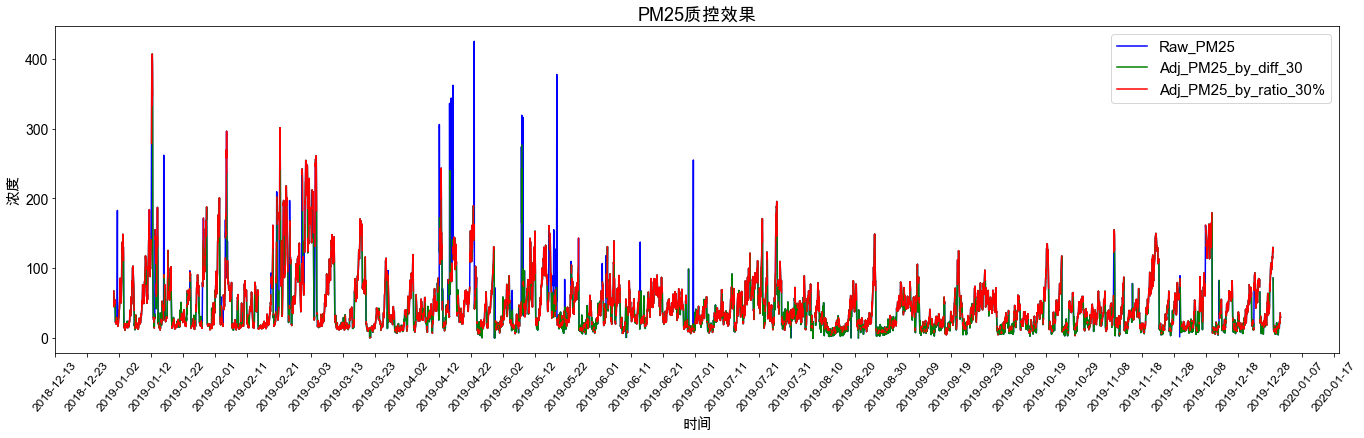

In [24]:
fig, ax = plt.subplots(figsize=(23, 6))

ax.plot(obs_diff['time'], obs_PM['PM25'], color='b', label='Raw_PM25')
tmp0 = deepcopy(PM_done)
tmp0.loc[tmp0['diff_PM25']>30, 'PM25'] = np.nan
tmp1 = deepcopy(PM_done)
tmp1.loc[tmp1['PM25_ratio']>0.3, 'PM25'] = np.nan
ax.plot(tmp0['time'], tmp0['PM25'], color='g', label='Adj_PM25_by_diff_30')
ax.plot(tmp1['time'], tmp1['PM25'], color='r', label='Adj_PM25_by_ratio_30%')

ax.set_xlabel('时间', fontsize=15)
ax.set_ylabel('浓度', fontsize=15)
# ticks
ax.xaxis.set_tick_params(rotation=50, labelsize=12)
xstart, xend = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(xstart, xend, 10))
ax.yaxis.set_tick_params(labelsize=14)
ax.set_title('PM25质控效果',fontsize=18)
# legennd
ax.legend(fontsize=15)
plt.show()

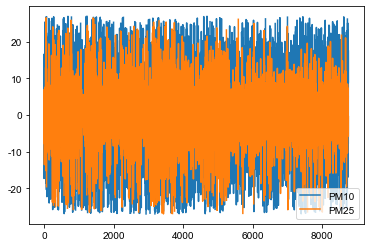

In [25]:
obs_ionic[['PM10', 'PM25']].diff()[abs(obs_ionic[['PM10', 'PM25']].diff())<27].plot()

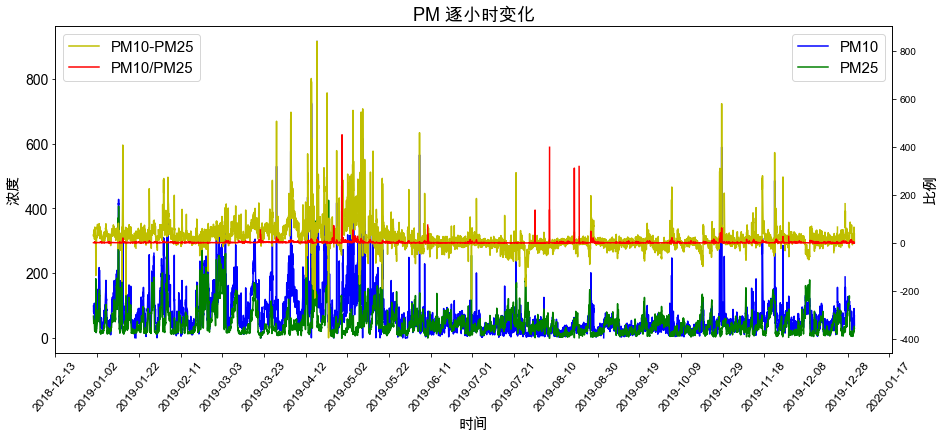

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
# plot line
ax.plot(obs_ionic['time'], obs_ionic['PM10'], color='b', label='PM10')
ax.plot(obs_ionic['time'], obs_ionic['PM25'], color='g', label='PM25')

ax1 = ax.twinx()
ax1.plot(obs_ionic['time'], obs_ionic['PM10']-obs_ionic['PM25'], color='y', label='PM10-PM25')
ax1.plot(obs_ionic['time'], obs_ionic['PM10']/obs_ionic['PM25'], color='r', label='PM10/PM25')

ax.set_xlabel('时间', fontsize=15)
ax.set_ylabel('浓度', fontsize=15)
ax1.set_ylabel('比例', fontsize=15)
ax.set_title('{} 逐小时变化'.format('PM'), fontsize=18)
# ticks
ax.xaxis.set_tick_params(rotation=50, labelsize=12)
xstart, xend = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(xstart, xend, 20))
ax.yaxis.set_tick_params(labelsize=14)
# legennd
ax.legend(fontsize=15)
ax1.legend(loc='upper left',fontsize=15)
plt.show()

## 离子平衡讨论

In [27]:
obs_ionic0['SO42-NO3-_mol'] = obs_ionic0['SO42-']*2/96 + obs_ionic0['NO3-']/62
obs_ionic0['NH4+_mol'] = obs_ionic0['NH4+']/18
obs_ionic0.sample(6)

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,ionic,SNA,others,SO42-NO3-_mol,NH4+_mol
8265,2019-12-11 09:00:00,84.59,14.48,0.118,0.680,0.633,0.036,0.250,0.058,1.000,NaN,2.775,2.313,0.462,0.024155,0.055556
3816,2019-06-09 00:00:00,36.21,11.12,0.100,3.260,0.600,0.160,0.060,NaN,2.320,NaN,6.500,6.180,0.320,0.065081,0.128889
6129,2019-09-13 09:00:00,22.64,32.66,0.246,8.831,3.912,0.020,0.272,0.110,5.671,0.020,19.082,18.414,0.668,0.223935,0.315056
4859,2019-07-22 11:00:00,58.47,91.97,0.326,19.936,12.665,0.211,0.509,0.554,13.053,0.040,47.294,45.654,1.640,0.585403,0.725167
1398,2019-02-28 06:00:00,110.18,78.90,3.302,18.926,8.382,0.368,0.602,0.600,13.838,0.073,46.091,41.146,4.945,0.479883,0.768778
411,2019-01-18 03:00:00,137.33,100.23,7.347,9.828,20.960,0.254,0.344,0.830,8.430,0.062,48.055,39.218,8.837,0.595183,0.468333


In [28]:
# 阴离子
obs_ionic0['AE'] = obs_ionic0['SO42-']/48 + obs_ionic0['NO3-']/62 + obs_ionic0['Cl-']/35.5
# 阳离子
obs_ionic0['CE'] = obs_ionic0['Na+']/23 + obs_ionic0['NH4+']/18 + \
    obs_ionic0['K+']/39 + obs_ionic0['Mg2+']/12 + obs_ionic0['Ca2+']/20
obs_ionic0['AE/CE'] = obs_ionic0['AE']/obs_ionic0['CE']
obs_ionic0.sample(3)

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,ionic,SNA,others,SO42-NO3-_mol,NH4+_mol,AE,CE,AE/CE
5607,2019-08-22 15:00:00,18.68,7.63,0.140,1.400,0.990,0.050,0.320,0.286,1.310,0.050,4.546,3.700,0.846,0.043206,0.072778,0.047149,0.100691,0.468258
4953,2019-07-26 09:00:00,25.08,28.87,0.140,2.630,2.960,0.078,0.381,0.125,2.360,0.050,8.724,7.950,0.774,0.104086,0.131111,0.108030,0.158948,0.679654
8664,2019-12-28 00:00:00,106.04,54.83,3.038,11.904,4.702,0.454,0.704,0.612,8.079,0.078,29.571,24.685,4.886,0.289958,0.448833,0.375536,0.524334,0.716214


In [29]:
obs_ionic0[['AE','CE','AE/CE']].describe(percentiles=[.1, .2, .3, .4, .5, .8, .9, .95]).T

,count,mean,std,min,10%,20%,30%,40%,50%,80%,90%,95%,max
AE,8708.0,0.320945,0.355722,0.010040,0.054499,0.079550,0.107625,0.147763,0.197408,0.494375,0.719850,1.031420,6.073102
CE,8304.0,0.463971,0.494280,0.022433,0.087181,0.128141,0.181398,0.251573,0.332290,0.701102,0.984102,1.329770,11.873694
AE/CE,8301.0,0.718251,0.315356,0.014987,0.449344,0.569575,0.628753,0.673565,0.708211,0.828977,0.930361,1.105298,14.129988


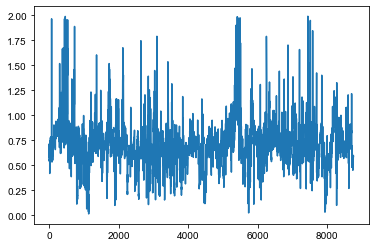

In [30]:
obs_ionic0[obs_ionic0['AE/CE']<2]['AE/CE'].plot()

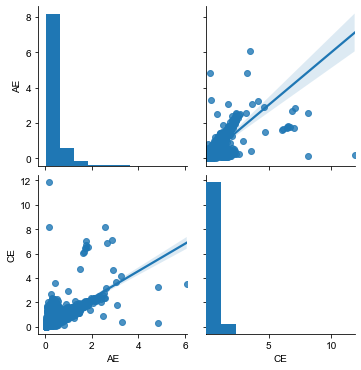

In [31]:
sns.pairplot(obs_ionic0[['AE','CE']], kind='reg')

In [33]:
obs_ionic0[['ionic','SNA','others','SO42-NO3-_mol','NH4+_mol']].describe(percentiles=[.5, .8, .9, .95, .99]).T

,count,mean,std,min,50%,80%,90%,95%,99%,max
ionic,8760.0,25.870779,27.453383,0.000000,16.204500,40.473800,57.688000,81.072800,126.964550,391.100000
SNA,8760.0,23.271088,24.794575,0.000000,14.309000,36.741000,52.618000,76.134350,116.463960,342.430000
others,8760.0,2.599691,6.560562,0.000000,1.355000,3.026000,4.596000,6.700050,24.693270,160.113000
SO42-NO3-_mol,8710.0,0.291331,0.324938,0.008265,0.177160,0.455708,0.658345,0.964295,1.495538,5.968595
NH4+_mol,8712.0,0.386714,0.379466,0.000944,0.269972,0.618244,0.851439,1.153500,1.763778,6.856111


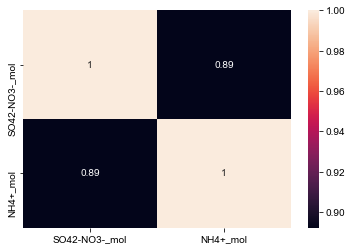

In [34]:
sns.heatmap(obs_ionic0[['SO42-NO3-_mol', 'NH4+_mol']].corr(), annot=True)

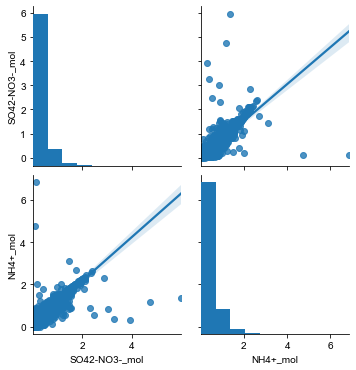

In [35]:
sns.pairplot(obs_ionic0[['SO42-NO3-_mol', 'NH4+_mol']], kind='reg')

## 线性回归讨论

In [36]:
# patay 方式建立线性模型
import past
from patsy import dmatrices

y, X = dmatrices('y ~ x', obs_ionic0[['NH4+_mol', 'SO42-NO3-_mol']].rename(
    columns={'SO42-NO3-_mol': 'x', 'NH4+_mol': 'y'}))
# Patsy对象可以直接传递到算法（比如numpy.linalg.lstsq）中，执行普通最小二乘回归
coef, resid, _, _ = np.linalg.lstsq(X, y, rcond=-1)
# 模型的元数据保留在design_info属性中，可以重新附加列名到拟合系数
coef = pd.Series(coef.squeeze(), index=X.design_info.column_names)

In [37]:
coef

Intercept    0.083077
x            1.042099
dtype: float64

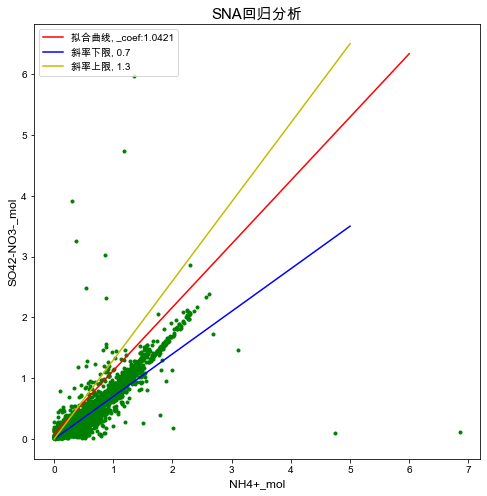

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))

# ax.scatter(obs_ionic0['SO42-NO3-_mol'], obs_ionic0['NH4+_mol'], color='g', marker='.')
ax.scatter(obs_ionic0['NH4+_mol'], obs_ionic0['SO42-NO3-_mol'], color='g', marker='.')
ax.plot(
    np.arange(0, obs_ionic0['NH4+_mol'].max()), 
    coef.x*np.arange(0, obs_ionic0['NH4+_mol'].max())+coef.Intercept,
    color='r', label='拟合曲线, _coef:{}'.format(round(coef.x, 4)))
ax.plot(np.arange(0, 6), 0.7*np.arange(0, 6), color='b', label='斜率下限, 0.7')
ax.plot(np.arange(0, 6), 1.3*np.arange(0, 6), color='y', label='斜率上限, 1.3')

ax.set_title('SNA回归分析', fontsize=15)
ax.set_xlabel('NH4+_mol', fontsize=12)
ax.set_ylabel('SO42-NO3-_mol', fontsize=12)
plt.legend()
plt.show()

In [39]:
obs_ionic0['balance'] = obs_ionic0['SO42-NO3-_mol'] / obs_ionic0['NH4+_mol']
obs_ionic0.shape

(8760, 20)

In [40]:
obs_ionic0.sample()

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,ionic,SNA,others,SO42-NO3-_mol,NH4+_mol,AE,CE,AE/CE,balance
46,2019-01-02 22:00:00,147.11,69.71,3.209,15.086,6.016,0.356,0.553,0.675,10.67,0.055,36.62,31.772,4.848,0.368656,0.592778,0.45905,0.656512,0.699226,0.621913


In [41]:
obs_ionic0[(obs_ionic0['balance']>=0.7)&(obs_ionic0['balance']<=1.3)].shape

(4909, 20)

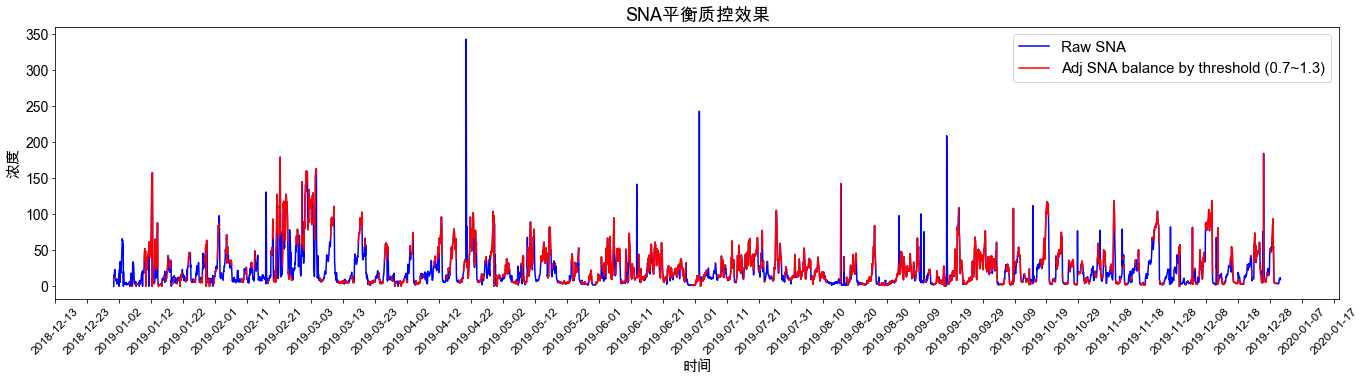

In [42]:
fig, ax = plt.subplots(figsize=(23, 5))

ax.plot(obs_ionic0['time'], obs_ionic0['SNA'], color='b', label='Raw SNA')
# ax.plot(obs_ionic0['time'], obs_ionic0['PM25'], color='g', label='Raw PM25')

tmp0 = deepcopy(obs_ionic0)
tmp0.loc[tmp0['balance']<0.7, 'SNA'] = np.nan
tmp0.loc[tmp0['balance']>1.3, 'SNA'] = np.nan
# tmp1 = deepcopy(SNA_condition)
# tmp1.loc[tmp1['SNA-_ratio']>1.3, 'SNA'] = np.nan
ax.plot(tmp0['time'], tmp0['SNA'], color='r', label='Adj SNA balance by threshold (0.7~1.3)')
# ax.plot(tmp1['time'], tmp1['SNA'], color='r', label='Adj NO3- by stats ratio 50%')

ax.set_xlabel('时间', fontsize=15)
ax.set_ylabel('浓度', fontsize=15)
# ticks
ax.xaxis.set_tick_params(rotation=45, labelsize=12)
xstart, xend = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(xstart, xend, 10))
ax.yaxis.set_tick_params(labelsize=14)
ax.set_title('SNA平衡质控效果',fontsize=18)
# legennd
ax.legend(fontsize=15)
plt.show()

In [43]:
# 直接计算比例
# (SO42-*2/96 + NO3-/62) / (NH4+/18) between 0.7 - 1.3
def calc_balance(x):
    data = (x['SO42-']*2/96 + x['NO3-']/62) / (x['NH4+']/18)

    return data

obs_ionic0['SNA_ratio'] = obs_ionic0[['SO42-', 'NO3-', 'NH4+']].apply(calc_balance, axis=1)
obs_ionic0.sample()

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,ionic,SNA,others,SO42-NO3-_mol,NH4+_mol,AE,CE,AE/CE,balance,SNA_ratio
2045,2019-03-27 05:00:00,167.23,114.13,2.105,34.269,8.99,0.494,0.979,0.901,16.678,0.147,64.563,59.937,4.626,0.740017,0.926556,0.799313,1.029173,0.776656,0.798676,0.798676


## 机器学习线性回归

In [164]:
# SNA回归分析

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression(fit_intercept=True)
.2, rand
    atobs_ionic0['SO42-NO3-_mol'].values[:].reshape(-1, 1)

    bs_ionic0['NH4+_mol'].values.re[:]shape(-1, 1)


IndentationError: unexpected indent (<ipython-input-164-c25bf12672b1>, line 8)

## 无监督的异常识别效果

In [45]:
# Define seven outlier detection tools to be compared
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF   # 基于聚类的局部异常因子
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.ocsvm import OCSVM
from pyod.models.lof import LOF

outliers_fraction = 0.05
random_state = np.random.RandomState(42)

In [46]:
obs_ionic.sample()

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
1393,2019-02-28 01:00:00,178.79,135.68,6.211,35.446,12.138,0.238,0.66,1.013,22.866,0.06


In [47]:
classifiers = {
    'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)': CBLOF(contamination=outliers_fraction, 
        check_estimator=False, random_state=random_state),
    'Feature Bagging': FeatureBagging(
        LOF(n_neighbors=35), 
        contamination=outliers_fraction,
        check_estimator=False,
        random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
    'Isolation Forest (IF)': IForest(contamination=outliers_fraction,random_state=random_state),
    # 'K Nearest Neighbors': KNN(contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',contamination=outliers_fraction),
    'PCA': PCA(svd_solver='auto'),
    'OCSVM': OCSVM(kernel='rbf', degree=4),
    'LOF': LOF()}

In [48]:
X = deepcopy(obs_ionic)
X['SO42-NO3-_mol'] = X['SO42-']*2/96 + X['NO3-']/62
X['NH4+_mol'] = X['NH4+']/18
X0 = X.dropna()
X.shape, X0.shape

((8760, 13), (8259, 13))

In [49]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    print('{}.\tfitting:\t{}'.format(i+1, clf_name))
    clf.fit(X0[['SO42-NO3-_mol', 'NH4+']])
    X0[clf_name] = clf.labels_

1.	fitting:	Angle-based Outlier Detector (ABOD)
2.	fitting:	Cluster-based Local Outlier Factor (CBLOF)
3.	fitting:	Feature Bagging
4.	fitting:	Histogram-base Outlier Detection (HBOS)
5.	fitting:	Isolation Forest (IF)
6.	fitting:	Average KNN
7.	fitting:	PCA
8.	fitting:	OCSVM
9.	fitting:	LOF


In [50]:
X0['ensemble'] = X0[X0.columns[14:]].apply(lambda x: x.sum(), axis=1)
X0['ensemble'] = [1 if x > 4 else 0 for x in X0['ensemble']]
X0.sample(3)

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,SO42-NO3-_mol,NH4+_mol,Angle-based Outlier Detector (ABOD),Cluster-based Local Outlier Factor (CBLOF),Feature Bagging,Histogram-base Outlier Detection (HBOS),Isolation Forest (IF),Average KNN,PCA,OCSVM,LOF,ensemble
2543,2019-04-16 23:00:00,184.12,140.35,0.582,31.445,9.792,0.298,0.756,0.538,15.414,0.032,0.711177,0.856333,0,1,0,0,0,0,1,0,0,0
6406,2019-09-24 22:00:00,30.85,18.61,0.150,1.730,2.230,0.050,0.403,0.130,1.670,0.040,0.074362,0.092778,0,0,0,0,0,0,0,0,0,0
2836,2019-04-29 04:00:00,62.34,68.60,0.460,25.906,6.761,0.112,0.430,0.218,13.587,0.030,0.558693,0.754833,0,0,0,0,0,0,0,0,0,0


In [51]:
# 95%保存率

X0[X0['ensemble']==0].shape

(8004, 23)

In [52]:
# 散点图可视化，可视化分类效果
def _plot_scatter(df, label: str):
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.scatter(df[df[label]==0]['NH4+_mol'], df[df[label]==0]['SO42-NO3-_mol'], color='g', marker='.', label='normal')
    ax.scatter(df[df[label]==1]['NH4+_mol'], df[df[label]==1]['SO42-NO3-_mol'], color='r', marker='.', label='outlier')
    ax.set_xlabel('NH4+_mol', fontsize=15)
    ax.set_ylabel('SO42-NO3-_mol', fontsize=15)
    plt.title(label, fontsize=15)
    plt.legend(fontsize=13)
    plt.show()

In [53]:
X0.sample()

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,SO42-NO3-_mol,NH4+_mol,Angle-based Outlier Detector (ABOD),Cluster-based Local Outlier Factor (CBLOF),Feature Bagging,Histogram-base Outlier Detection (HBOS),Isolation Forest (IF),Average KNN,PCA,OCSVM,LOF,ensemble
7892,2019-11-25 20:00:00,45.08,23.05,1.03,4.647,1.244,0.067,0.343,0.2,3.871,0.04,0.100868,0.215056,0,0,0,0,0,0,0,0,0,0


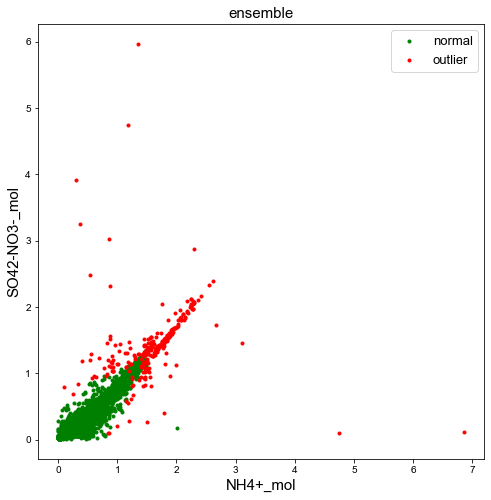

In [54]:
_plot_scatter(X0, 'ensemble')

In [55]:
# 无监督学习识别效果
uml_result = obs_ionic0[['time','SNA']].merge(X0[['time','ensemble']], left_on='time', right_on='time', how='outer')
uml_result.sample()

,time,SNA,ensemble
8,2019-01-01 08:00:00,22.689,0.0


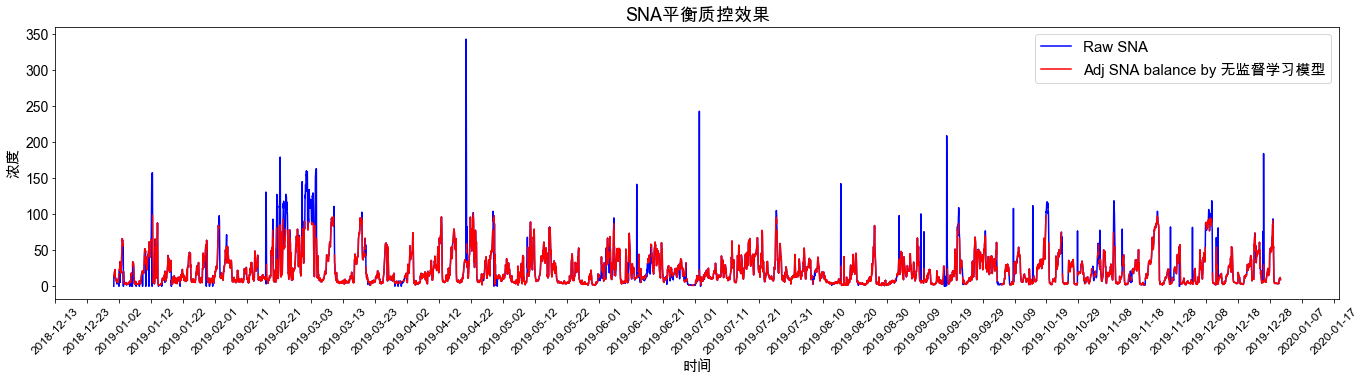

In [56]:
fig, ax = plt.subplots(figsize=(23, 5))

ax.plot(uml_result['time'], uml_result['SNA'], color='b', label='Raw SNA')

tmp0 = deepcopy(uml_result)
tmp0.loc[tmp0['ensemble']!=0, 'SNA'] = np.nan
ax.plot(tmp0['time'], tmp0['SNA'], color='r', label='Adj SNA balance by 无监督学习模型')

ax.set_xlabel('时间', fontsize=15)
ax.set_ylabel('浓度', fontsize=15)
# ticks
ax.xaxis.set_tick_params(rotation=45, labelsize=12)
xstart, xend = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(xstart, xend, 10))
ax.yaxis.set_tick_params(labelsize=14)
ax.set_title('SNA平衡质控效果',fontsize=18)
# legennd
ax.legend(fontsize=15)
plt.show()

## SNA质控测试

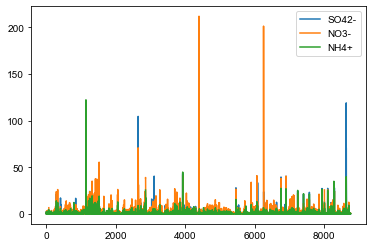

In [57]:
abs(obs_ionic0[['SO42-', 'NO3-', 'NH4+']].diff()).plot()

In [58]:
obs_SNA = obs_ionic[['time', 'PM10', 'PM25', 'SO42-', 'NO3-', 'NH4+']]
obs_diff0 = obs_SNA[['SO42-', 'NO3-', 'NH4+']].diff().rename(
    columns={'SO42-':'diff_SO42-', 'NO3-':'diff_NO3-', 'NH4+':'diff_NH4+'})
obs_diff0['time'] = obs_SNA['time']

SNA_done = pd.merge(obs_SNA, obs_diff0, left_on='time', right_on='time', how='outer')
SNA_done['SO42-_ratio'] = abs(SNA_done['diff_SO42-']) / SNA_done['SO42-']
SNA_done['NO3-_ratio'] = abs(SNA_done['diff_NO3-']) / SNA_done['NO3-']
SNA_done['NH4+_ratio'] = abs(SNA_done['diff_NH4+']) / SNA_done['NH4+']
SNA_done['PM25/PM10'] = SNA_done['PM25'] / SNA_done['PM10']
SNA_done.sample(3)

,time,PM10,PM25,SO42-,NO3-,NH4+,diff_SO42-,diff_NO3-,diff_NH4+,SO42-_ratio,NO3-_ratio,NH4+_ratio,PM25/PM10
6743,2019-10-08 23:00:00,54.54,16.62,0.800,2.456,1.260,-0.040,-1.294,-0.509,0.050000,0.526873,0.403968,0.304730
4651,2019-07-13 19:00:00,61.06,47.94,13.577,7.749,9.622,0.158,1.906,0.520,0.011637,0.245967,0.054043,0.785129
3151,2019-05-12 07:00:00,81.43,82.91,10.377,37.203,17.983,0.307,-2.229,-0.738,0.029585,0.059915,0.041039,1.018175


In [59]:
SNA_done.shape

(8760, 13)

In [60]:
SNA_condition = deepcopy(SNA_done)
SNA_condition[(SNA_condition['PM25']<=15)&(SNA_condition['PM25/PM10']<0.3)] = np.nan
SNA_condition.shape

(8760, 13)

In [61]:
SNA_condition[(SNA_condition['PM25']>15)&(SNA_condition['PM25/PM10']>=0.3)].shape

(6628, 13)

In [62]:
SNA_condition.describe(percentiles=[.25, .28, .3, .4, .5, .8, .9, .95, .97, .99]).T

,count,mean,std,min,25%,28%,30%,40%,50%,80%,90%,95%,97%,99%,max
PM10,8143.0,69.213347,66.209474,0.007000,28.990000,31.040000,32.412000,39.070000,46.910000,102.390000,151.618000,196.720000,231.510800,315.112800,916.600000
PM25,8144.0,47.715645,41.175316,3.970000,20.625000,21.900000,22.855400,28.652000,35.315000,67.798000,95.128000,131.023500,149.677100,202.486200,425.020000
SO42-,8152.0,5.838560,6.593669,0.031000,1.889000,2.045000,2.168300,2.860000,3.760000,9.079000,12.537700,16.419450,21.023330,28.752880,178.330000
NO3-,8152.0,11.401833,13.503885,0.056000,2.690000,2.941680,3.160300,4.340000,6.114500,18.587200,27.803600,38.709350,46.794660,63.978270,217.690000
NH4+,8154.0,7.313620,6.890622,0.030000,2.317250,2.620000,2.844900,3.933000,5.320000,11.530600,15.733700,21.267200,24.540500,32.221700,123.410000
diff_SO42-,8124.0,0.018947,3.502911,-85.640000,-0.250000,-0.193000,-0.162000,-0.050000,0.015000,0.426000,0.923000,1.660350,2.563860,5.701260,118.892000
diff_NO3-,8123.0,0.013943,5.143653,-206.413000,-0.667500,-0.525840,-0.440000,-0.130000,0.040000,1.165600,2.363000,3.973900,5.596120,10.378140,211.705000
diff_NH4+,8125.0,0.023806,2.786481,-122.162000,-0.361000,-0.283280,-0.239400,-0.081000,0.000000,0.606000,1.196600,2.055000,2.801400,5.501280,75.790000
SO42-_ratio,8124.0,0.180205,1.308015,0.000000,0.031159,0.035486,0.038230,0.054549,0.074760,0.188675,0.304603,0.459317,0.638620,1.133419,64.806452
NO3-_ratio,8123.0,0.250757,0.920194,0.000000,0.047198,0.054435,0.059383,0.085533,0.120467,0.315126,0.496920,0.709583,0.917529,1.704522,39.088843


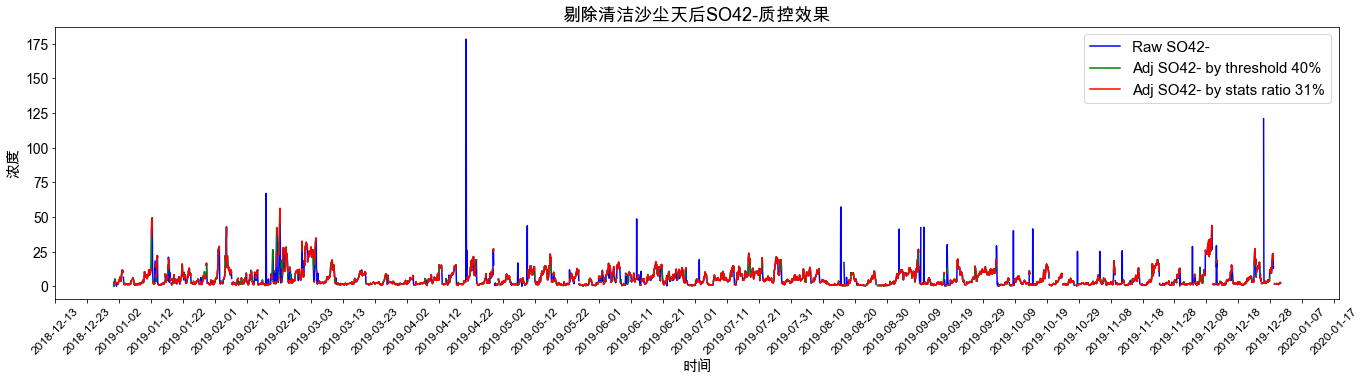

In [63]:
fig, ax = plt.subplots(figsize=(23, 5))

ax.plot(SNA_condition['time'], SNA_condition['SO42-'], color='b', label='Raw SO42-')
tmp0 = deepcopy(SNA_condition)
tmp0.loc[tmp0['SO42-_ratio']>0.4, 'SO42-'] = np.nan
tmp1 = deepcopy(SNA_condition)
tmp1.loc[tmp1['SO42-_ratio']>0.31, 'SO42-'] = np.nan
ax.plot(tmp0['time'], tmp0['SO42-'], color='g', label='Adj SO42- by threshold 40%')
ax.plot(tmp1['time'], tmp1['SO42-'], color='r', label='Adj SO42- by stats ratio 31%')

ax.set_xlabel('时间', fontsize=15)
ax.set_ylabel('浓度', fontsize=15)
# ticks
ax.xaxis.set_tick_params(rotation=45, labelsize=12)
xstart, xend = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(xstart, xend, 10))
ax.yaxis.set_tick_params(labelsize=14)
ax.set_title('剔除清洁沙尘天后SO42-质控效果',fontsize=18)
# legennd
ax.legend(fontsize=15)
plt.show()

## 所有水溶性离子的相关性热力图

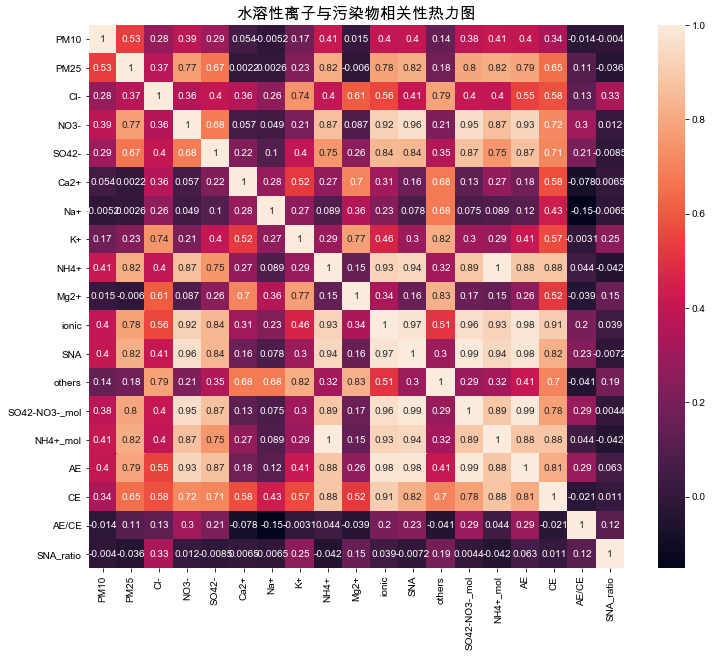

In [233]:
plt.figure(figsize=(12, 10))
sns.heatmap(obs_ionic0.corr(), annot=True)
plt.title('水溶性离子与污染物相关性热力图', fontsize=16)
# plt.savefig('../DataVisual/images/水溶性离子与污染物相关性热力图.png')
plt.show()

In [84]:
abs(obs_ionic0[['SO42-', 'NO3-', 'NH4+']].diff()).describe(percentiles=[.05, .1, .2, .3, .4, .5, .8, .9, .95, .99]).T

,count,mean,std,min,5%,10%,20%,30%,40%,50%,80%,90%,95%,99%,max
SO42-,8682.0,0.879130,3.365249,0.0,0.015,0.030,0.065,0.114,0.178,0.263,0.8788,1.6447,2.8899,10.21763,118.892
NO3-,8681.0,1.805765,5.218960,0.0,0.030,0.070,0.170,0.320,0.500,0.740,2.2400,4.0120,6.4100,15.50400,211.705
NH4+,8681.0,0.931148,2.663261,0.0,0.016,0.034,0.082,0.150,0.242,0.366,1.1450,2.0430,3.1490,8.77840,122.162


## 缺失数据的查看 及 补数的方案探索

In [64]:
obs_ionic1

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
0,2019-01-01 00:00:00,97.92,66.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2019-01-02 00:00:00,37.69,22.969,NaN,NaN,NaN,NaN,NaN,NaN,3.095,NaN
39,2019-01-02 15:00:00,61.55,35.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2019-01-03 00:00:00,149.63,85.430,NaN,NaN,5.511,NaN,0.583,NaN,NaN,NaN
72,2019-01-04 00:00:00,180.96,130.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8703,2019-12-29 15:00:00,113.22,NaN,3.637,43.577,23.597,0.300,0.677,1.120,26.174,0.055
8714,2019-12-30 02:00:00,79.50,NaN,0.350,1.400,1.741,0.072,0.376,0.149,1.465,0.030
8722,2019-12-30 10:00:00,NaN,9.640,0.210,0.800,1.983,0.069,0.564,0.155,1.306,0.030
8745,2019-12-31 09:00:00,32.44,NaN,0.190,0.820,1.485,0.083,0.474,0.105,1.315,0.020


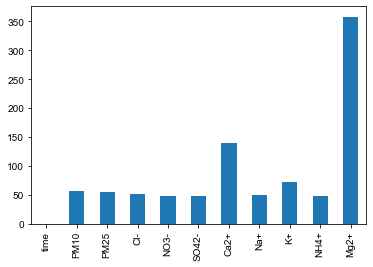

In [65]:
obs_ionic.isna().sum().plot(kind='bar')

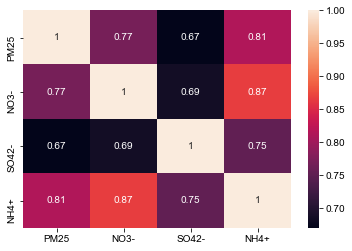

In [66]:
sns.heatmap(obs_ionic[['PM25', 'NO3-', 'SO42-', 'NH4+']].corr(), annot=True)

In [73]:
obs_ionic1[obs_ionic1['Mg2+'].isna()]

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
0,2019-01-01 00:00:00,97.92,66.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2019-01-02 00:00:00,37.69,22.969,NaN,NaN,NaN,NaN,NaN,NaN,3.095,NaN
39,2019-01-02 15:00:00,61.55,35.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2019-01-03 00:00:00,149.63,85.430,NaN,NaN,5.511,NaN,0.583,NaN,NaN,NaN
72,2019-01-04 00:00:00,180.96,130.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8266,2019-12-11 10:00:00,66.92,14.350,0.130,1.050,0.708,0.036,0.260,0.056,0.970,NaN
8268,2019-12-11 12:00:00,62.90,7.390,0.190,1.130,0.820,0.024,0.252,0.047,1.030,NaN
8269,2019-12-11 13:00:00,50.20,5.080,0.200,1.130,0.824,0.020,0.246,0.047,1.020,NaN
8270,2019-12-11 14:00:00,51.10,5.740,0.190,1.170,0.890,0.021,0.268,0.052,1.020,NaN


In [74]:
obs_ionic['time']

0      2019-01-01 00:00:00
1      2019-01-01 01:00:00
2      2019-01-01 02:00:00
3      2019-01-01 03:00:00
4      2019-01-01 04:00:00
               ...        
8755   2019-12-31 19:00:00
8756   2019-12-31 20:00:00
8757   2019-12-31 21:00:00
8758   2019-12-31 22:00:00
8759   2019-12-31 23:00:00
Name: time, Length: 8760, dtype: datetime64[ns]

In [76]:
obs_ionic0.dropna()['time']

1      2019-01-01 01:00:00
2      2019-01-01 02:00:00
3      2019-01-01 03:00:00
4      2019-01-01 04:00:00
5      2019-01-01 05:00:00
               ...        
8754   2019-12-31 18:00:00
8755   2019-12-31 19:00:00
8757   2019-12-31 21:00:00
8758   2019-12-31 22:00:00
8759   2019-12-31 23:00:00
Name: time, Length: 8259, dtype: datetime64[ns]

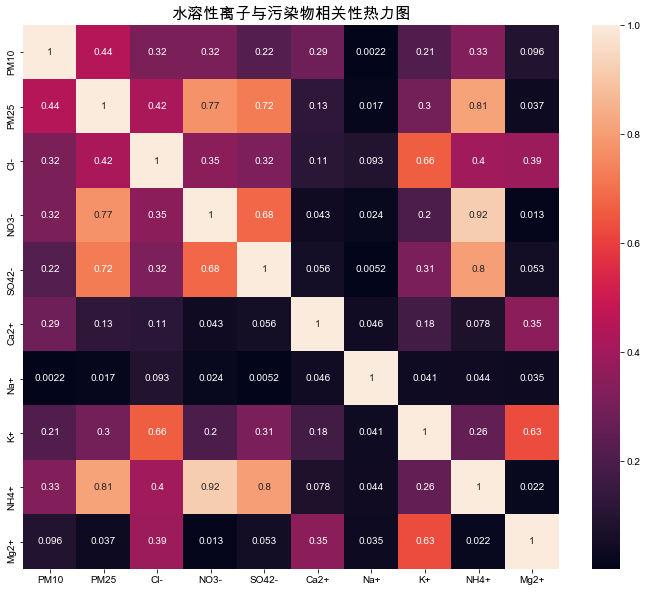

In [83]:
plt.figure(figsize=(12, 10))
plt.title('水溶性离子与污染物相关性热力图', fontsize=16)
# plt.savefig('../DataVisual/images/水溶性离子与污染物相关性热力图.png')
sns.heatmap(
    X0.loc[X0['ensemble']==0, ['PM10','PM25','Cl-','NO3-','SO42-','Ca2+','Na+','K+','NH4+','Mg2+']].corr(), 
    annot=True)
plt.show()

+ PM25~NH4+    PM25~SO42-    PM25~NO3-   
+ Cl-~K+    SO42-~NO3-    NH4+~SO42-
+ Mg2+～K+

In [111]:
obs_ionic1[obs_ionic1['SO42-'].isna()]

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
0,2019-01-01 00:00:00,97.92,66.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2019-01-02 00:00:00,37.69,22.969,NaN,NaN,NaN,NaN,NaN,NaN,3.095,NaN
39,2019-01-02 15:00:00,61.55,35.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2019-01-04 00:00:00,180.96,130.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2019-01-06 00:00:00,49.92,30.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,2019-01-06 14:00:00,87.26,52.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,2019-01-06 15:00:00,109.17,61.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,2019-01-06 16:00:00,109.38,66.930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,2019-01-06 17:00:00,123.86,76.230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,2019-01-06 18:00:00,121.77,81.430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
SO_NH = obs_ionic1[(obs_ionic1['SO42-'].isna())&(obs_ionic1['NH4+'].notna())]
SO_NH

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
24,2019-01-02 00:00:00,37.69,22.969,NaN,NaN,NaN,NaN,NaN,NaN,3.095,NaN
144,2019-01-07 00:00:00,161.62,102.870,NaN,NaN,NaN,NaN,NaN,NaN,10.001,NaN
384,2019-01-17 00:00:00,133.66,71.910,NaN,NaN,NaN,NaN,NaN,NaN,5.444,NaN
6237,2019-09-17 21:00:00,40.35,51.840,0.3,8.101,NaN,0.092,0.556,0.303,6.287,0.042


In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression(fit_intercept=True)
_X = X0[['SO42-', 'NH4+', 'NO3-', 'PM25']]
X_train,  X_test, y_train, y_test = train_test_split(
    _X['NH4+'],  _X['SO42-'], test_size=0.2, random_state=0)

In [107]:
lr.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
so42_p = lr.predict(SO_NH['NH4+'].values.reshape(-1, 1)).reshape(1, -1)[0]
print(so42_p)
SO_NH['SO42-'] = np.round(so42_p, 3)
SO_NH

[2.83222535 7.70777275 4.49058921 5.0857364 ]


,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
24,2019-01-02 00:00:00,37.69,22.969,NaN,NaN,2.832,NaN,NaN,NaN,3.095,NaN
144,2019-01-07 00:00:00,161.62,102.870,NaN,NaN,7.708,NaN,NaN,NaN,10.001,NaN
384,2019-01-17 00:00:00,133.66,71.910,NaN,NaN,4.491,NaN,NaN,NaN,5.444,NaN
6237,2019-09-17 21:00:00,40.35,51.840,0.3,8.101,5.086,0.092,0.556,0.303,6.287,0.042


In [138]:
lr1 = LinearRegression(normalize=True)
x_tr, x_te, y_tr, y_te = train_test_split(
    _X[['NH4+', 'SO42-']], _X['NO3-'], test_size=0.2, random_state=0)
lr.fit(x_tr, y_tr.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
SO_NH['NO3-'] = np.round(lr.predict(SO_NH[['NH4+','SO42-']]).reshape(1, -1)[0], 3)
SO_NH

,time,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+
24,2019-01-02 00:00:00,37.69,22.969,NaN,4.355,2.832,NaN,NaN,NaN,3.095,NaN
144,2019-01-07 00:00:00,161.62,102.870,NaN,15.924,7.708,NaN,NaN,NaN,10.001,NaN
384,2019-01-17 00:00:00,133.66,71.910,NaN,8.290,4.491,NaN,NaN,NaN,5.444,NaN
6237,2019-09-17 21:00:00,40.35,51.840,0.3,9.702,5.086,0.092,0.556,0.303,6.287,0.042


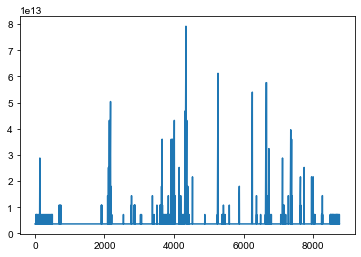

In [121]:
X0[['time']].diff()['time'].plot()

In [133]:
X0[['time','PM25','Cl-','NO3-','SO42-','Ca2+','Na+','K+','NH4+','Mg2+']].to_csv(
    '../prediction_project/sjz_pm25/obs_comp.csv', 
    encoding='utf-8')